<a href="https://colab.research.google.com/github/nimratmann/datasci_6_anova/blob/main/datasci_6_anova_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Loading Packages


In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 2. Data Preparation

## Loading in Dataset

In [4]:
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [5]:
# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

In [25]:
df1 = pd.DataFrame(X)
df1

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


## Variables of Interest

Question: Does race and maximum glucose serum levels have an influence on the number of days spent in the hospital?

DV: time_in_hospital

IV1: race

IV2: max_glu_serum

H0: There is no nfluence of race and maximum glucose serum levels on the number of days spent in the hospital.

H1: There is a significant influence of race and maximum glucose serum levels on the number of days spent in the hospital.

In [28]:
df = df1[['race', 'max_glu_serum', 'time_in_hospital']]
df

,race,max_glu_serum,time_in_hospital
0,Caucasian,None,1
1,Caucasian,None,3
2,AfricanAmerican,None,2
3,Caucasian,None,2
4,Caucasian,None,1
...,...,...,...
101761,AfricanAmerican,None,3
101762,AfricanAmerican,None,5
101763,Caucasian,None,1
101764,Caucasian,None,10


## Data Types

In [29]:
data_type = df.dtypes
data_type

race                object
max_glu_serum       object
time_in_hospital     int64
dtype: object

# 3. Assumption Checks

## Normality

In [30]:
stats.shapiro(df['time_in_hospital'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8869192600250244, pvalue=0.0)

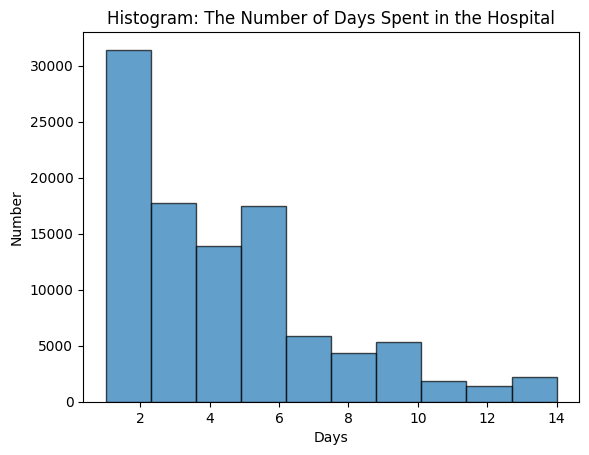

In [31]:
plt.hist(df['time_in_hospital'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram: The Number of Days Spent in the Hospital')
plt.xlabel('Days')
plt.ylabel('Number')
plt.show()

In [32]:
# Shapiro-Wilks Test
groups = df.groupby(['race', 'max_glu_serum'])

for (race_status, max_glu_serum_status), group_df in groups:
    _, p_value = stats.shapiro(group_df['time_in_hospital'])

    print(f"Group ({race_status}, {max_glu_serum_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

Group (AfricanAmerican, >200):
P-value from Shapiro-Wilk Test: 1.306062387129714e-07

Group (AfricanAmerican, >300):
P-value from Shapiro-Wilk Test: 0.00010721784929046407

Group (AfricanAmerican, None):
P-value from Shapiro-Wilk Test: 0.0

Group (AfricanAmerican, Norm):
P-value from Shapiro-Wilk Test: 5.7211940046597576e-11

Group (Asian, >200):
P-value from Shapiro-Wilk Test: 0.45637601613998413

Group (Asian, >300):
P-value from Shapiro-Wilk Test: 0.004400327336043119

Group (Asian, None):
P-value from Shapiro-Wilk Test: 2.40454112470046e-23

Group (Asian, Norm):
P-value from Shapiro-Wilk Test: 0.7167417407035828

Group (Caucasian, >200):
P-value from Shapiro-Wilk Test: 6.120417392500063e-27

Group (Caucasian, >300):
P-value from Shapiro-Wilk Test: 1.6320560252387502e-21

Group (Caucasian, None):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, Norm):
P-value from Shapiro-Wilk Test: 2.7905771509420416e-38

Group (Hispanic, >200):
P-value from Shapiro-Wilk Test: 0.0013016338925

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Homoscedasticity (Equal Variances)

In [34]:
# Levene Test
stats.levene(
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['max_glu_serum'] == '>300'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['max_glu_serum'] == '>300'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['max_glu_serum'] == '>300'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['max_glu_serum'] == '>300'],
    df['time_in_hospital'][df['race'] == 'Other'][df['max_glu_serum'] == '>300'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['max_glu_serum'] == '>200'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['max_glu_serum'] == '>200'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['max_glu_serum'] == '>200'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['max_glu_serum'] == '>200'],
    df['time_in_hospital'][df['race'] == 'Other'][df['max_glu_serum'] == '>200'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['max_glu_serum'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['max_glu_serum'] == 'None'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['max_glu_serum'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['max_glu_serum'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Other'][df['max_glu_serum'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['max_glu_serum'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['max_glu_serum'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['max_glu_serum'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['max_glu_serum'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Other'][df['max_glu_serum'] == 'Norm'],
)

LeveneResult(statistic=6.612907372118989, pvalue=9.970107179318563e-18)

# 4. Conducting the Anova

In [35]:
model = ols('time_in_hospital ~ C(race) * C(max_glu_serum)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                 sum_sq       df          F        PR(>F)
C(race)                      636.485094      4.0  17.882793  1.091248e-14
C(max_glu_serum)            1860.682035      3.0  69.704049  5.049806e-45
C(race):C(max_glu_serum)      94.751295     12.0   0.887383  5.592528e-01
Residual                  885111.771743  99473.0        NaN           NaN


In [51]:
# Anova Interpretation:
#

### Anova Interpretation